In [27]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from IPython.display import clear_output

In [31]:
%matplotlib tk

plt.figure(figsize=(15, 15))
grid = np.full([100, 100], 255).astype(np.uint8)
plt.imshow(grid, cmap="gray")
obstacle_size = 3
num_obstacles = 8

for _ in range(num_obstacles):
    loc = np.round(plt.ginput(1)[0]).astype(np.uint8)
    
    grid[loc[1]-obstacle_size:loc[1]+obstacle_size, 
         loc[0]-obstacle_size:loc[0]+obstacle_size] = 0
    
    plt.imshow(grid, cmap="gray")

start_coords = plt.ginput(1, show_clicks=False)[0]
plt.scatter(start_coords[0], start_coords[1], c = 'b')

goal_coords = plt.ginput(1, show_clicks=False)[0]
plt.scatter(goal_coords[0], goal_coords[1], c = 'r')

goal_loc = (int(goal_coords[1]), int(goal_coords[0]))
start_loc = (int(start_coords[1]), int(start_coords[0]))

plt.show()
print(f"{start_loc = }")
print(f"{goal_loc = }")

start_loc = (8, 32)
goal_loc = (93, 97)


PATH FOUND!


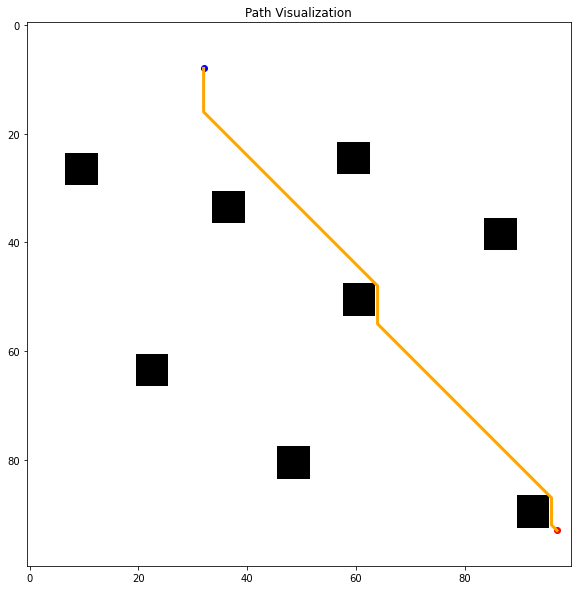

In [37]:
%matplotlib inline
class BFS():
    def __init__(self, grid: np.ndarray, start_loc: tuple[int, int], goal_loc: tuple[int, int]):
        self.grid = grid
        self.rows, self.cols = grid.shape
        self.start_loc = start_loc
        self.goal_loc = goal_loc

    def get_neighbors(self, row: int, col: int):
        """Get valid neighbors of the current cell."""
        neighbors = [
            (row+1, col), (row, col+1), (row-1, col), (row, col-1),  # 4-way neighbors
            (row+1, col+1), (row+1, col-1), (row-1, col+1), (row-1, col-1)  # Diagonal
        ]
        # Filter neighbors to stay within grid bounds
        neighbors = filter(
            lambda n: not (n[0] < 0 or n[1] < 0 or n[0] >= self.rows or n[1] >= self.cols), 
            neighbors
        )
        return list(neighbors)

    def recover_path(self, pred):
        """Recover the path from the goal back to the start."""
        curr_loc = self.goal_loc
        path = []
        while curr_loc is not None:
            path.append(curr_loc)
            curr_loc = pred.get(curr_loc)
        return path[::-1]  # Reverse to get path from start to goal
    
    def plot(self, path):
        """Visualize the grid and the found path."""
        x = [p[1] for p in path]
        y = [p[0] for p in path]
        
        plt.figure(figsize=(10, 10))
        plt.imshow(self.grid, cmap="gray")
        plt.plot(x, y, c='orange', linewidth=3)
        plt.scatter(start_loc[1], start_loc[0], c='b')
        plt.scatter(goal_loc[1], goal_loc[0], c='r')
        plt.title("Path Visualization")
        plt.show()

    def search(self):
        """Perform BFS to find the shortest path."""
        visited = set()  # Keep track of visited nodes
        queue = deque()  # Queue for BFS
        predecessors = {self.start_loc: None}  # To reconstruct the path

        queue.append(self.start_loc)  # Start BFS from the start location

        while queue:
            curr_loc = queue.popleft()  # BFS uses popleft (FIFO)
            if curr_loc in visited:
                continue
            visited.add(curr_loc)

            if curr_loc == self.goal_loc:
                print("PATH FOUND!")
                return self.recover_path(predecessors)

            # Add valid neighbors to the queue
            for n_loc in self.get_neighbors(*curr_loc):
                if n_loc not in visited and self.grid[n_loc]: 
                    queue.append(n_loc)
                    if n_loc not in predecessors:
                        predecessors[n_loc] = curr_loc
        
        print("NO PATH FOUND!")
        return None


bfs = BFS(grid, start_loc, goal_loc)
path = bfs.search()
if path:
    bfs.plot(path)